In [1]:
import pandas as pd
import numpy as np

# Series


In [2]:
list_1 = ["a","b","c","d"]
labels = [1,2,3,4]
ser_1 = pd.Series(data=list_1, index=labels)
print(ser_1)

arr_1 = np.array([1,2,3,4])
ser_2 = pd.Series(arr_1)
print(ser_2)

dict_1 = {"f_name":"Samet","l_name":"Aslan", "age":22}
ser_3 = pd.Series(dict_1)
print(ser_3)
print(ser_2+ser_2)
print(np.exp(ser_2))



1    a
2    b
3    c
4    d
dtype: object
0    1
1    2
2    3
3    4
dtype: int64
f_name    Samet
l_name    Aslan
age          22
dtype: object
0    2
1    4
2    6
3    8
dtype: int64
0     2.718282
1     7.389056
2    20.085537
3    54.598150
dtype: float64


In [3]:
ser_4 = pd.Series({4:5, 5:6, 7:8, 8:9}, name="rand_names")
print("ser_4 name: ",ser_4.name)
ser_2 + ser_4

ser_4 name:  rand_names


0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
5   NaN
7   NaN
8   NaN
dtype: float64

# DataFrames

In [4]:
arr_2 = np.random.randint(20,50,size=(2,3))
df_1 = pd.DataFrame(arr_2, ["A","B"],["C","D","E"])
df_1

,C,D,E
A,20,23,24
B,34,29,39


In [5]:
dict_3 = {"one":pd.Series([1,2,3],index=["a","b","c"]),
         "two":pd.Series([1,2,3,4],index=["a","b","c","d"])}
df_2 = pd.DataFrame(dict_3)
df_2

,one,two
a,1.0,1
b,2.0,2
c,3.0,3
d,NaN,4


In [6]:
df_3 = pd.DataFrame.from_dict(dict([("A",[1,2,3]),("B",[4,5,6])]))
df_3

,A,B
0,1,4
1,2,5
2,3,6


# Editing and Retreiving Data

In [7]:
print(df_1)
df_1[["C","E"]]


    C   D   E
A  20  23  24
B  34  29  39


,C,E
A,20,24
B,34,39


In [8]:
#Grab a row
df_1.loc["B"]

C    34
D    29
E    39
Name: B, dtype: int64

In [9]:
# Grab a row by index position
df_1.iloc[1]

C    34
D    29
E    39
Name: B, dtype: int64

In [10]:
# Grab a row and column to find a specific value
df_1.loc["A","E"]

24

In [11]:
df_1.loc[["A","B"],["D","E"]]

,D,E
A,23,24
B,29,39


In [12]:
# Create a new column 
df_1["Total"] = df_1["D"]+df_1["E"]
df_1

,C,D,E,Total
A,20,23,24,47
B,34,29,39,68


In [13]:
print(df_2)
df_2["mult"] = df_2["one"]*df_2["two"]
df_2

   one  two
a  1.0    1
b  2.0    2
c  3.0    3
d  NaN    4


,one,two,mult
a,1.0,1,1.0
b,2.0,2,4.0
c,3.0,3,9.0
d,NaN,4,NaN


In [14]:
dict_2 = {"C":44,"D":45,"E":46}
new_row = pd.Series(dict_2, name="F")
df_1 = df_1.append(new_row)
df_1

,C,D,E,Total
A,20.0,23.0,24.0,47.0
B,34.0,29.0,39.0,68.0
F,44.0,45.0,46.0,NaN


In [15]:
df_1.drop("Total", axis=1, inplace = True) # IF you set inplace as True , You cant access column you dropped later
df_1

,C,D,E
A,20.0,23.0,24.0
B,34.0,29.0,39.0
F,44.0,45.0,46.0


In [16]:
print(df_1)
df_1.drop("B", axis=0, inplace = True)
df_1

      C     D     E
A  20.0  23.0  24.0
B  34.0  29.0  39.0
F  44.0  45.0  46.0


,C,D,E
A,20.0,23.0,24.0
F,44.0,45.0,46.0


In [17]:
df_1
df_1["Sex"] = ["Man", "Woman"]
df_1.set_index("Sex", inplace =True)
df_1

,C,D,E
Sex,,,
Man,20.0,23.0,24.0
Woman,44.0,45.0,46.0


In [18]:
print(df_1)
df_1["Sex"] = ["Man", "Woman"]
df_1.set_index("Sex", inplace =True)
df_1

          C     D     E
Sex                    
Man    20.0  23.0  24.0
Woman  44.0  45.0  46.0


,C,D,E
Sex,,,
Man,20.0,23.0,24.0
Woman,44.0,45.0,46.0


In [19]:
array_ex = np.random.randint(25,70, size=(2,3))
df_ex = pd.DataFrame(array_ex, ["A","B"],["C", "D","E"])
print(df_ex)

    C   D   E
A  66  59  64
B  65  62  41


In [20]:
df_ex["Total"] = df_ex["C"]+ df_ex["D"]+ df_ex["E"]
df_ex

,C,D,E,Total
A,66,59,64,189
B,65,62,41,168


In [21]:
df_ex.drop("Total", axis=1)

,C,D,E
A,66,59,64
B,65,62,41


In [22]:
df_ex.drop("Total", axis=1, inplace= True)
print(df_ex)

    C   D   E
A  66  59  64
B  65  62  41


In [23]:
df_2.assign(div=df_2["one"] / df_2["two"])


,one,two,mult,div
a,1.0,1,1.0,1.0
b,2.0,2,4.0,1.0
c,3.0,3,9.0,1.0
d,NaN,4,NaN,NaN


In [24]:
df_3 = pd.DataFrame({"A":[1., np.nan, 3., np.nan]})
df_4 = pd.DataFrame({"A":[8., 9., 2., 4.]})
print(df_3, df_4)
df_3.combine_first(df_4)

     A
0  1.0
1  NaN
2  3.0
3  NaN      A
0  8.0
1  9.0
2  2.0
3  4.0


,A
0,1.0
1,9.0
2,3.0
3,4.0


In [25]:
arr_2 = np.random.randint(10,50, size=(2,3))
df_1  = pd.DataFrame(arr_2, ["A","B"],["C","D","E"])
print(df_1)
# gt = greater than, lt, ge = greater than or equal to , le, eq , ne
print("Greater then 40 \n", df_1.gt(40))

    C   D   E
A  24  32  45
B  36  17  18
Greater then 40 
        C      D      E
A  False  False   True
B  False  False  False


In [26]:
bool_1 = df_1 >40
df_1[bool_1]

,C,D,E
A,NaN,NaN,45.0
B,NaN,NaN,NaN


In [27]:
df_1["E"]> 40
print("df_1:\n" , df_1)
df_1[df_1["E"]>30]
df_2 = df_1[df_1["E"] > 30 ]
print("df_2: ", df_2)
df_2["C"]
print(df_1[df_1["E"]> 20]  [["C","D"]])

df_1:
     C   D   E
A  24  32  45
B  36  17  18
df_2:      C   D   E
A  24  32  45
    C   D
A  24  32


## Conditionals

In [28]:
arr_3 = np.array([[1,2,3],[4,5,6],[7,8,9]])
df_2 = pd.DataFrame(arr_3, ["A","B","C"],["X","Y","Z"])
print(df_2)
df_2[(df_2["X"] >3 ) & (df_2["X"] < 7 )]

   X  Y  Z
A  1  2  3
B  4  5  6
C  7  8  9


,X,Y,Z
B,4,5,6


# File Input & Output

 Pandas can work with th following data types: CSV, Plain Text , JSON, XML, PDF, SQL, HTML, XLSX, DOCX, ZIP,Images , Hiearchical Data Format, MP3, and MP4

In [35]:
import pymysql
cs_df = pd.read_csv("/home/parasametol/Work/ds_projects/pandas-tutorial-master/ComputerSales.csv")
cs_df
# Copy a df to csv file (save):
cs_df.to_csv("/home/parasametol/Work/ds_projects/pandas-tutorial-master/ComputerSalesBU1.csv")
pd.read_excel("/home/parasametol/Work/ds_projects/pandas-tutorial-master/Financial Sample.xlsx",0)
cs_df.to_excel("/home/parasametol/Work/ds_projects/pandas-tutorial-master/Financial SampleBU.xlsx")
pd.read_excel("/home/parasametol/Work/ds_projects/pandas-tutorial-master/Financial SampleBU.xlsx")

try:
    db_connection = pymysql.connect(db = "students", user="studentadmin",
                                   passwd="TurtleDove", host="localhost", port = 3306)
    stud_df = pd.read_sql("SELECT * FROM students", con = db_connection)
    print(stud_df)
except Exception as e:
    print("Exception : {}".format(e))
finally:
    db_connection.close()

Exception : (2003, "Can't connect to MySQL server on 'localhost' ([Errno 111] Connection refused)")


NameError: name 'db_connection' is not defined

## Basics and Math

In [37]:
cs_df.head()

,Sale ID,Contact,Sex,Age,State,Product ID,Product Type,Sale Price,Profit,Lead,Month,Year
0,1,Paul Thomas,M,43,OH,M01-F0024,Desktop,479.99,143.39,Website,January,2018
1,2,Margo Simms,F,37,WV,GT13-0024,Desktop,1249.99,230.89,Flyer 4,January,2018
2,3,Sam Stine,M,26,PA,I3670,Desktop,649.99,118.64,Website,February,2018
3,4,Moe Eggert,M,35,PA,I3593,Laptop,399.99,72.09,Website,March,2018
4,5,Jessica Elk,F,55,PA,15M-ED,Laptop,699.99,98.09,Flyer 4,March,2018


In [38]:
cs_df.tail()

,Sale ID,Contact,Sex,Age,State,Product ID,Product Type,Sale Price,Profit,Lead,Month,Year
34,35,Michelle Samms,F,46,NY,MY2J2LL,Tablet,999.99,146.69,Website,April,2020
35,36,Sally Struthers,F,45,NY,81TC00,Laptop,649.99,122.34,Website,April,2020
36,37,Jason Case,M,57,PA,M01-F0024,Desktop,479.99,143.39,Flyer 4,April,2020
37,38,Doug Johnson,M,51,PA,GA401IV,Laptop,1349.99,180.34,Website,May,2020
38,39,Moe Eggert,M,35,PA,I3593,Laptop,399.99,72.09,Website,May,2020


In [39]:
cs_df[:2]

,Sale ID,Contact,Sex,Age,State,Product ID,Product Type,Sale Price,Profit,Lead,Month,Year
0,1,Paul Thomas,M,43,OH,M01-F0024,Desktop,479.99,143.39,Website,January,2018
1,2,Margo Simms,F,37,WV,GT13-0024,Desktop,1249.99,230.89,Flyer 4,January,2018


In [43]:
cs_df.index.array
cs_df.to_numpy()


array([[1, 'Paul Thomas', 'M', 43, 'OH', 'M01-F0024', 'Desktop', 479.99,
        143.39, 'Website', 'January', 2018],
       [2, 'Margo Simms', 'F', 37, 'WV', 'GT13-0024', 'Desktop', 1249.99,
        230.89, 'Flyer 4', 'January', 2018],
       [3, 'Sam Stine', 'M', 26, 'PA', 'I3670', 'Desktop', 649.99,
        118.64, 'Website', 'February', 2018],
       [4, 'Moe Eggert', 'M', 35, 'PA', 'I3593', 'Laptop', 399.99, 72.09,
        'Website', 'March', 2018],
       [5, 'Jessica Elk', 'F', 55, 'PA', '15M-ED', 'Laptop', 699.99,
        98.09, 'Flyer 4', 'March', 2018],
       [6, 'Sally Struthers', 'F', 45, 'PA', 'GT13-0024', 'Desktop',
        1249.99, 230.89, 'Flyer 2', 'April', 2018],
       [7, 'Michelle Samms', 'F', 46, 'OH', 'GA401IV', 'Laptop', 1349.99,
        180.34, 'Email', 'May', 2018],
       [8, 'Mick Roberts', 'M', 23, 'OH', 'MY2J2LL', 'Tablet', 999.99,
        146.69, 'Website', 'July', 2018],
       [9, 'Ed Klondike', 'M', 52, 'OH', '81TC00', 'Laptop', 649.99,
        122.34

In [57]:
dict_3 = {"one": pd.Series([1., 2., 3.,], index = ["a", "b", "c"]),
         "two": pd.Series([1., 2., 3., 4.], index = ["a", "b", "c", "d"])}
df_2 = pd.DataFrame(dict_3)
print(df_2)
print(df_2.fillna(0, inplace=True))
row = df_2.iloc[1]
print(row)
df_2.add(row, axis="columns")

col = df_2["two"]
df_2.sub(col, axis=0)
df_2.empty



   one  two
a  1.0  1.0
b  2.0  2.0
c  3.0  3.0
d  NaN  4.0
None
one    2.0
two    2.0
Name: b, dtype: float64


False

In [66]:
df_5 = pd.DataFrame({"A": range(3), "B": range(1,4)})
print(df_5)
df_5.transform(lambda x: np.sqrt(x))
df_5.transform({"A" : lambda x: x**2 , "B": lambda x: x**3})
df_5.applymap(lambda x: x**2)

   A  B
0  0  1
1  1  2
2  2  3


,A,B
0,0,1
1,1,4
2,4,9


In [71]:
df_2["two"].nunique()
df_2["two"].value_counts()
df_2.columns
df_2.index
df_2.isnull()

,one,two
a,False,False
b,False,False
c,False,False
d,False,False


## Group Data

In [76]:
dict_5 = {"Store": [1,2,1,2], "Flavor": ["Choc", "Van", "Straw", "Choc"],
         "Sales": [26,12,18,22]}
df_11 = pd.DataFrame(dict_5)
print(df_11)
by_store = df_11.groupby("Store")
by_store.mean()
by_store.sum().loc[1]
by_store.describe()


   Store Flavor  Sales
0      1   Choc     26
1      2    Van     12
2      1  Straw     18
3      2   Choc     22


Sales                                              
      count  mean       std   min   25%   50%   75%   max
Store                                                    
1       2.0  22.0  5.656854  18.0  20.0  22.0  24.0  26.0
2       2.0  17.0  7.071068  12.0  14.5  17.0  19.5  22.0

# Concatenate and Merge Data

In [80]:
df_12 = pd.DataFrame({"A": [1,2,3],
                     "B": [4,5,6]}, index=[1,2,3])
df_13 = pd.DataFrame({"A": [7,8,9],
                     "B": [10,11,12]}, index =[4,5,6])
pd.concat([df_12, df_13])
df_12 = pd.DataFrame({"A": [1,2,3],
                     "B": [4,5,6] , "key": [1,2,3]})
df_13 = pd.DataFrame({"A": [7,8,9],
                     "B": [10,11,12] , "key" : [1,2,3]})
pd.merge(df_12, df_13, how ="inner", on="key")

,A_x,B_x,key,A_y,B_y
0,1,4,1,7,10
1,2,5,2,8,11
2,3,6,3,9,12


In [83]:
df_12 = pd.DataFrame({"A":[1,2,3], 
                     "B": [4,5,6]}, index=[1,2,3])
df_13 = pd.DataFrame({"C": [7,8,9],
                     "D":[10,11,12]}, index = [1,4,5])
df_12.join(df_13, how= "outer")

,A,B,C,D
1,1.0,4.0,7.0,10.0
2,2.0,5.0,NaN,NaN
3,3.0,6.0,NaN,NaN
4,NaN,NaN,8.0,11.0
5,NaN,NaN,9.0,12.0


## Statistics

In [106]:
ics_df = pd.read_csv("/home/parasametol/Work/ds_projects/pandas-tutorial-master/icecreamsales.csv")
ics_df.count()
ics_df.sum()
ics_df["Sales"].mean()
ics_df["Sales"].median()
ics_df["Sales"].mode()
ics_df["Sales"].min()
ics_df["Sales"].max()
ics_df["Sales"].product()
ics_df["Sales"].std()
ics_df["Sales"].var()
ics_df["Sales"].sem()
ics_df["Sales"].skew()
ics_df["Sales"].kurtosis()
ics_df["Sales"].quantile(.5)
ics_df["Sales"].cumsum()
ics_df["Sales"].cumprod()
ics_df["Sales"].cummax()
ics_df["Sales"].cummin()
ics_df.describe()

,Temperature,Sales
count,12.000000,12.000000
mean,61.166667,400.000000
std,17.055169,105.651227
min,37.000000,228.000000
25%,46.750000,323.000000
50%,62.500000,394.000000
75%,76.000000,496.000000
max,83.000000,556.000000


In [110]:
ser_dice = pd.Series(data = [2,3,3,4,4,4,5,5,5,5,6,6,
                            6,6,6,7,7,7,7,7,7,8,8,8,
                            8,8,9,9,9,9,10,10,10,11,11,12])
ser_dice.value_counts()
print(df_2)
df_2.agg(["mean","std"])

   one  two
a  1.0  1.0
b  2.0  2.0
c  3.0  3.0
d  0.0  4.0


,one,two
mean,1.500000,2.500000
std,1.290994,1.290994


## Iteration



In [123]:
ser_7 = pd.Series(range(5), index=["a","b","c","d","e"])
arr_4 = np.random.randint(10,50 ,size=(2,3))
df_8 = pd.DataFrame(arr_4,  ["B", "C"], ["C","D","E"])
print(ser_7)
for col in ser_7:
    print(col)
print()
print(df_8)
for label, ser in df_8.items():
    print(label)
    print(ser)
print()

for index , row in df_8.iterrows():
    print(f"{index}\n{row}")
print()    
for row in df_8.itertuples():
    print(row)

a    0
b    1
c    2
d    3
e    4
dtype: int64
0
1
2
3
4

    C   D   E
B  21  12  12
C  35  15  24
C
B    21
C    35
Name: C, dtype: int64
D
B    12
C    15
Name: D, dtype: int64
E
B    12
C    24
Name: E, dtype: int64

B
C    21
D    12
E    12
Name: B, dtype: int64
C
C    35
D    15
E    24
Name: C, dtype: int64

Pandas(Index='B', C=21, D=12, E=12)
Pandas(Index='C', C=35, D=15, E=24)


## Sorting

In [132]:
print(df_8)
df_8.sort_index(ascending=False)
df_8.sort_values(by = "C")

    C   D   E
B  21  12  12
C  35  15  24


,C,D,E
B,21,12,12
C,35,15,24


## Passing Data to Functions

In [157]:
import sys
def get_total_profit(data):
    total_profit = data["Profit"]
    print(f"Total Profit is : {total_profit.sum()} " )
get_total_profit(cs_df)

def split_name(df):
    def get_names(full_name):
        f_name, l_name = full_name.split()
        return pd.Series((f_name,l_name), index=["First Name","Last Name"])
    names = df["Contact"].apply(get_names)
    df[names.columns] = names
    return df
split_name(cs_df).head()

def group_by_age(df):
    bins = [0,30,50,sys.maxsize]
    labels = ["<30", "30-50", ">50"]
    age_group = pd.cut(df["Age"],bins=bins, labels = labels)
    df["Age Group"] = age_group
    return df
group_by_age(cs_df)
cs_df.pipe(split_name).pipe(group_by_age).head()

Total Profit is : 5459.010000000001 


,Sale ID,Contact,Sex,Age,State,Product ID,Product Type,Sale Price,Profit,Lead,Month,Year,First Name,Last Name,Age Group
0,1,Paul Thomas,M,43,OH,M01-F0024,Desktop,479.99,143.39,Website,January,2018,Paul,Thomas,30-50
1,2,Margo Simms,F,37,WV,GT13-0024,Desktop,1249.99,230.89,Flyer 4,January,2018,Margo,Simms,30-50
2,3,Sam Stine,M,26,PA,I3670,Desktop,649.99,118.64,Website,February,2018,Sam,Stine,<30
3,4,Moe Eggert,M,35,PA,I3593,Laptop,399.99,72.09,Website,March,2018,Moe,Eggert,30-50
4,5,Jessica Elk,F,55,PA,15M-ED,Laptop,699.99,98.09,Flyer 4,March,2018,Jessica,Elk,>50


## Aligning , Reindexing and Renaming Indexes

In [160]:
ser_6 = pd.Series(range(5), index = ["a","b","c","d","e"])
sl_1 = ser_6[:4]
sl_2 = ser_6[1:]
print(sl_1)
print(sl_2)
sl_1.align(sl_2, join = "inner") # You can assign left, right to join.

a    0
b    1
c    2
d    3
dtype: int64
b    1
c    2
d    3
e    4
dtype: int64


(b    1
 c    2
 d    3
 dtype: int64,
 b    1
 c    2
 d    3
 dtype: int64)

In [170]:
arr_3 = np.random.randint(10,50, size=(2,3))
df_6 = pd.DataFrame(arr_3, ["A","B"],["C", "D", "E"])
arr_3 = np.random.randint(10,50, size=(2,3))
df_7 = pd.DataFrame(arr_3, ["B","C"],["C","D","E"])
print(df_6)
print(df_7)
df_6.align(df_7)
df_6.reindex()
df_6.drop(["A"], axis=0)
df_6.rename(columns = {"C": "Men", "D" : "Women", "E": "Pets"}, inplace=True)

    C   D   E
A  29  13  12
B  27  20  39
    C   D   E
B  20  41  46
C  34  42  27


## MultiIndex

In [194]:
days = ["Day 1", "Day 1","Day 1","Day 2","Day 2","Day 2",]
meals = [1,2,3,1,2,3]
hier_index = list(zip(days,meals))
hier_index = pd.MultiIndex.from_tuples(hier_index)
arr_5 = np.random.randint(500, 700, size = (6,2))
df_9 = pd.DataFrame(arr_5, hier_index, ["M", "F"])
print(df_9)
df_9.loc["Day 2"].loc[2]["F"]
df_9.index.names = ["Day","Meal"]
df_9.xs(2, level = "Meal")


           M    F
Day 1 1  658  636
      2  619  503
      3  639  562
Day 2 1  570  582
      2  687  609
      3  567  623


,M,F
Day,,
Day 1,619,503
Day 2,687,609


In [195]:
dict_6  = {"A":["Day 1", "Day 1", "Day 1", "Day 2", "Day 2", "Day 2",],
          "B": [1,2,3,1,2,3],
          "C": ["M", "F", "M", "F", "M", "F", ],
          "D": [1,2,3,4,5,6]}
df_14 = pd.DataFrame(dict_6)
df_14.pivot_table(values = "D", index = ["A","B"], columns=["C"] )

C          F    M
A     B          
Day 1 1  NaN  1.0
      2  2.0  NaN
      3  NaN  3.0
Day 2 1  4.0  NaN
      2  NaN  5.0
      3  6.0  NaN

## Handling Missing Data

In [205]:
dict_4 = {"A": [1,2,np.nan], "B": [4, np.nan, np.nan], "C" : [7.,8.,9.,]}
df_10 = pd.DataFrame(dict_4)
print(df_10)
df_10.dropna() # set axis = 1 to drop columns having NaN values
df_10.dropna(thresh=2) # thershold value to drop nan values
df_10.fillna(value=0)
df_10.fillna(value=df_10["A"].mean())
df_10.fillna(method="ffill") # takes the previous value. You can also use bfill to take next value

     A    B    C
0  1.0  4.0  7.0
1  2.0  NaN  8.0
2  NaN  NaN  9.0


,A,B,C
0,1.0,4.0,7.0
1,2.0,4.0,8.0
2,2.0,4.0,9.0


# Experiment with Data

In [247]:
print(cs_df.columns)
cs_df["Profit"].mean()
cs_df[["Product ID", "Profit"]].max(axis=0)
cs_df[cs_df["State"]=="WV"]["State"].count()
len(cs_df[cs_df["Year"]==2019].index)
cs_df["Product ID"].value_counts()
cs_df[cs_df["Product ID"]=="15M-ED"]["Contact"]
cs_df[(cs_df["Lead"]=="Website") & (cs_df["Profit"]>150)]["Lead"].count()
cs_df["Profit"].apply(lambda cents: str(cents).split(".")[1] == "89").value_counts()

Index(['Sale ID', 'Contact', 'Sex', 'Age', 'State', 'Product ID',
       'Product Type', 'Sale Price', 'Profit', 'Lead', 'Month', 'Year',
       'First Name', 'Last Name', 'Age Group'],
      dtype='object')


False    35
True      4
Name: Profit, dtype: int64

## Visualization

      Hist
0        6
1        3
2        6
3        1
4        5
...    ...
4995     4
4996     6
4997     1
4998     6
4999     5

[5000 rows x 1 columns]

      Hist  Odds
0        6     9
1        3     4
2        6     7
3        1     5
4        5     6
...    ...   ...
4995     4     8
4996     6    12
4997     1     2
4998     6    12
4999     5    11

[5000 rows x 2 columns]


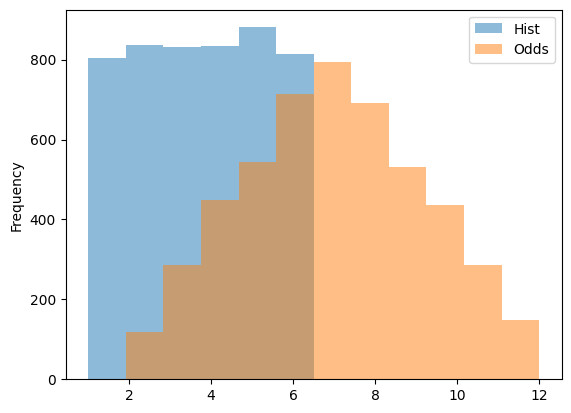

In [251]:
import matplotlib.pyplot as plt
%matplotlib inline

df_dice = pd.DataFrame(np.random.randint(1,7,5000), columns=["Hist"])
print(df_dice)
df_dice["Odds"] = df_dice["Hist"] + np.random.randint(1,7,5000)
print()
print(df_dice)
ax = df_dice.plot.hist(bins=12, alpha=0.5)

<AxesSubplot:>

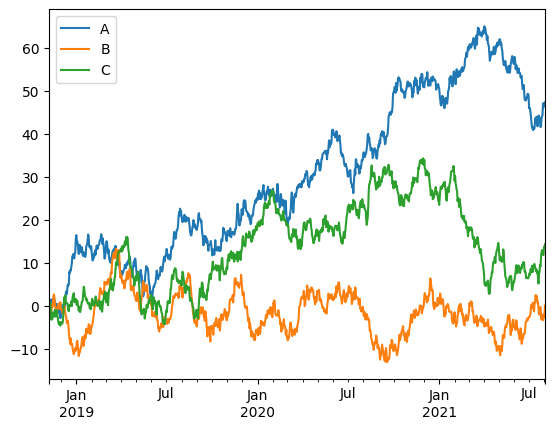

In [257]:
df_15 = pd.DataFrame(np.random.randn(1000,3),
                 index = pd.date_range("11/07/2018", periods=1000),
                 columns=list("ABC"))
df_15 = df_15.cumsum()
df_15.plot()

<AxesSubplot:>

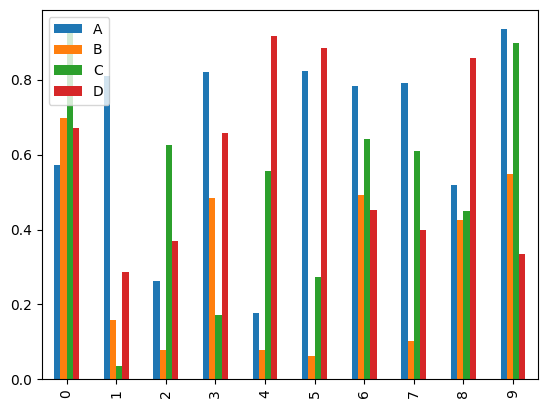

In [262]:
vals = ["A","B","C","D"]
df_15 = pd.DataFrame(np.random.rand(10,4), columns = vals)
df_15.plot.bar()

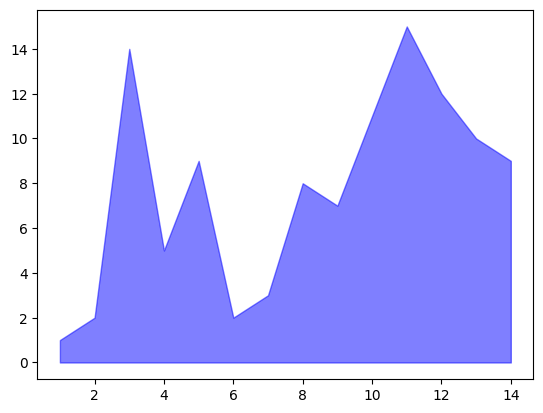

<AxesSubplot:>

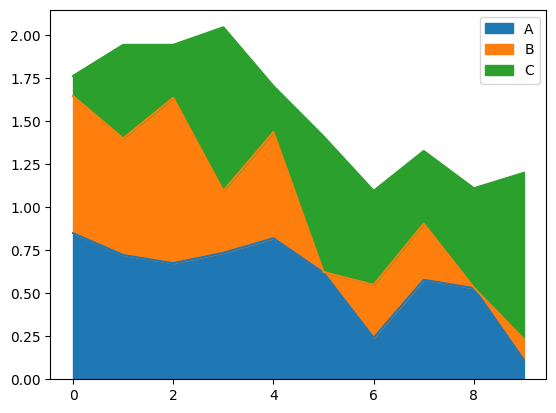

In [270]:
x_rng = range(1,15)
y_vals = [1,2,14,5,9,2,3,8,7,11,15,12,10,9]
plt.fill_between(x_rng, y_vals, color="blue", alpha = 0.5)
plt.show()

pd.DataFrame(np.random.rand(10,3), columns=["A", "B", "C"]).plot.area()

<AxesSubplot:xlabel='A', ylabel='B'>

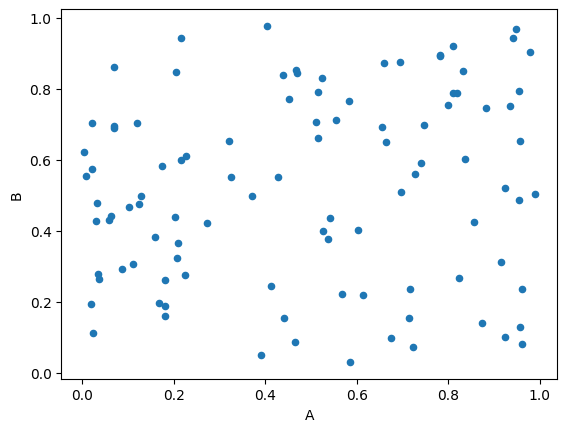

In [286]:
pd.DataFrame(np.random.rand(100,2), 
            columns=["A", "B"]).plot.scatter(x="A", y="B")

<AxesSubplot:xlabel='C', ylabel='D'>

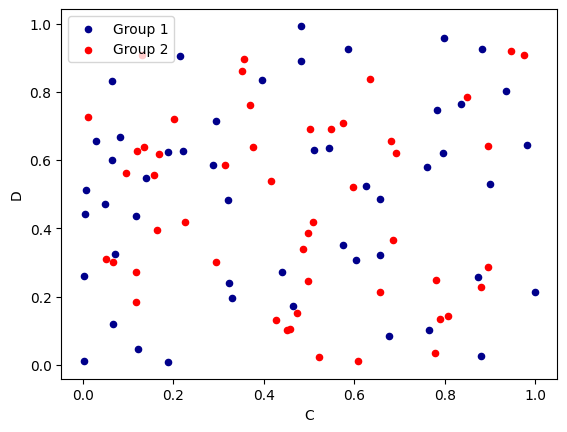

In [288]:
df_15 = pd.DataFrame(np.random.rand(50,4),
                    columns=["A","B","C","D"])
ax = df_15.plot.scatter(x="A",y="B", color="DarkBlue", label="Group 1")
df_15.plot.scatter(x="C", y="D", color ="red", label="Group 2", ax=ax)


<AxesSubplot:ylabel='Pie'>

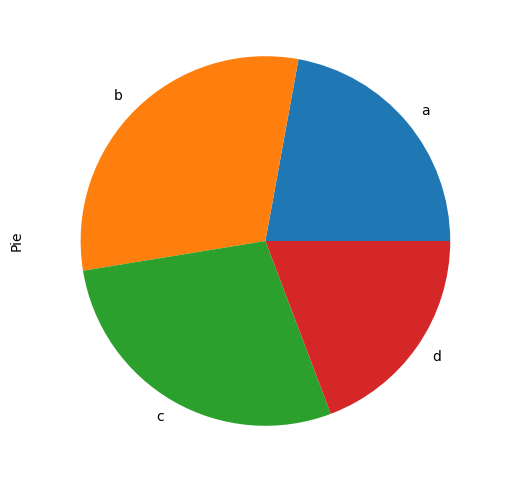

In [292]:
pd.Series(np.random.rand(4),
         index=["a","b","c","d"],
         name="Pie").plot.pie(figsize=(6,6))